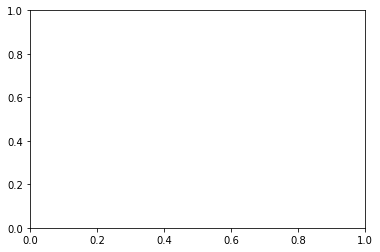

In [1]:
import matplotlib as mp
from navipy.arenatools.patterns import generate_1overf_noise
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating patterns

## Pink noise

Generating patterns with $1/f^\beta$ frequency distribution (pink noise) that mimic the statistics of natural images. 

In [2]:
def norm_imgray(img):
    if img.ndim!=2:
        raise NameError('Not a gray image, ndim!=2')
    face=img[...,np.newaxis]
    face=face.repeat(3,axis=2)
    face-=face.min()
    if face.max()<=0:
        face +=1
    else:
        face=face/face.max()
    return face

def gray2red(img):
    face=norm_imgray(img)
    face=1-face
    face[:,:,1]=1-face[:,:,0]
    face[:,:,2]=1-face[:,:,0]
    face[:,:,0]=1
    face*=255
    return face.astype(np.uint8)

def gray2purple(img):
    face=norm_imgray(img)
    face=1-face
    face[:,:,0]*=80/255
    face[:,:,1]*=255/255
    face[:,:,2]*=0/255
    face=face.max()-face
    face-=0.5
    face=127+170*face
    return face.astype(np.uint8)

def gray2orange(img):
    face=norm_imgray(img)
    face=1-face
    face[:,:,0]*=0/255
    face[:,:,1]*=80/255
    face[:,:,2]*=255/255
    face=face.max()-face
    face-=0.5
    face=127+170*face
    return face.astype(np.uint8)



### Pink noise of different colours 
#### Black-white

In [3]:
image_dim = (210,297) #in pixel
beta=1.7 # a number usually between 1 and 2
# Gray image
imgnoise = generate_1overf_noise(image_dim,beta)

#### Red-white
Seen as black-white image by bees, and homogeneous background for near-IR cameras

In [4]:
imgnoise_red = gray2red(imgnoise.copy())

#### Orange-white and Purple-white
Useful for colour learning / direction association

In [5]:
imgnoise_orange = gray2orange(imgnoise.copy())
imgnoise_purple = gray2purple(imgnoise.copy())

#### An overview

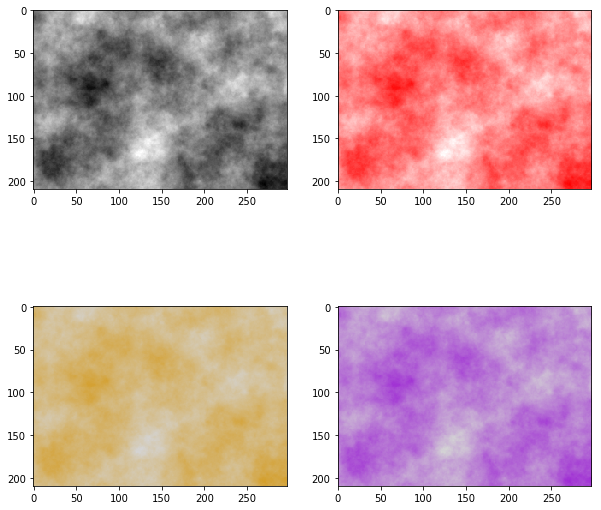

In [6]:
fig,axarr = plt.subplots(2,2, figsize=(10,10))

axarr[0,0].imshow(imgnoise,'gray')
axarr[0,1].imshow(imgnoise_red)
axarr[1,0].imshow(imgnoise_orange)
axarr[1,1].imshow(imgnoise_purple)



#### How to save the pattern, and convert for printing

In python:
```python
mp.image.imsave('PathToImage.png', imgnoise)
```

Within Ubuntu-terminal:

The image have been generated with 1 pixel per milimeter, thus a density of 25.4 point per inch. To convert the images to pdf I used the following command:

``` bash
for f in *.png; do echo ${f::-4}; convert $f -density 25.4 ${f::-4}.pdf; done
```